## BAB 1 - Mengumpulkan data

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix

In [57]:
data = pd.read_csv ('hepatitis.data')
data

,2,30,2.1,1,2.2,2.3,2.4,2.5,1.1,2.6,2.7,2.8,2.9,2.10,1.00,85,18,4.0,?,1.2
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
150,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
151,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
152,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [58]:
data = pd.read_csv ('hepatitis.data', header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [59]:
data.columns=["Class","Age","Sex","Steroid","Antivirals","Fatigue","Malaise","Anorexia","Liver_Big","Liver_Firm",
                 "Spleen_Palpable","Spiders","Ascites","Varices","Bilirubin","Alk_Phosphate","Sgot","Albumin","Protime","Histology"]

In [60]:
data

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_Big,Liver_Firm,Spleen_Palpable,Spiders,Ascites,Varices,Bilirubin,Alk_Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [61]:
data.head()

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_Big,Liver_Firm,Spleen_Palpable,Spiders,Ascites,Varices,Bilirubin,Alk_Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [62]:
data.tail()

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_Big,Liver_Firm,Spleen_Palpable,Spiders,Ascites,Varices,Bilirubin,Alk_Phosphate,Sgot,Albumin,Protime,Histology
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2
154,1,43,1,2,2,1,2,2,2,2,1,1,1,2,1.20,100,19,3.1,42,2


## BAB 2 – Menelaah data



In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Class            155 non-null    int64 
 1   Age              155 non-null    int64 
 2   Sex              155 non-null    int64 
 3   Steroid          155 non-null    object
 4   Antivirals       155 non-null    int64 
 5   Fatigue          155 non-null    object
 6   Malaise          155 non-null    object
 7   Anorexia         155 non-null    object
 8   Liver_Big        155 non-null    object
 9   Liver_Firm       155 non-null    object
 10  Spleen_Palpable  155 non-null    object
 11  Spiders          155 non-null    object
 12  Ascites          155 non-null    object
 13  Varices          155 non-null    object
 14  Bilirubin        155 non-null    object
 15  Alk_Phosphate    155 non-null    object
 16  Sgot             155 non-null    object
 17  Albumin          155 non-null    ob

In [64]:
categorical_col = []
for column in data.columns:
    if data[column].dtype == object and len(data[column].unique()) <= 50: #mengecek level/isi data kolom (bisa object, int, dan tipe data lainnya)
        categorical_col.append(column)
        print(f"{column} : {data[column].unique()}")
        print("====================================")


Steroid : ['1' '2' '?']
Fatigue : ['2' '1' '?']
Malaise : ['2' '1' '?']
Anorexia : ['2' '1' '?']
Liver_Big : ['1' '2' '?']
Liver_Firm : ['2' '1' '?']
Spleen_Palpable : ['2' '1' '?']
Spiders : ['2' '1' '?']
Ascites : ['2' '1' '?']
Varices : ['2' '?' '1']
Bilirubin : ['1.00' '0.90' '0.70' '?' '1.30' '2.20' '2.00' '1.20' '0.60' '0.40' '0.80'
 '1.40' '2.30' '0.50' '0.30' '4.60' '1.80' '3.50' '4.10' '1.60' '2.80'
 '1.50' '2.50' '3.00' '4.80' '2.40' '1.70' '1.10' '3.20' '2.90' '8.00'
 '3.90' '1.90' '4.20' '7.60']
Albumin : ['4.0' '3.5' '?' '4.4' '3.9' '3.7' '4.9' '2.9' '4.3' '4.1' '4.2' '4.7'
 '3.8' '2.7' '4.6' '5.0' '3.3' '4.5' '3.4' '3.1' '3.0' '2.6' '5.3' '4.8'
 '2.8' '3.6' '2.1' '6.4' '2.4' '2.2']
Protime : ['?' '80' '75' '85' '54' '52' '78' '46' '63' '62' '64' '39' '100' '47'
 '70' '36' '40' '74' '60' '73' '90' '21' '77' '29' '41' '66' '57' '56'
 '76' '58' '84' '38' '67' '31' '51' '23' '72' '32' '30' '0' '50' '43' '35'
 '48' '42']


In [65]:
data['Class'].value_counts()

Class
2    123
1     32
Name: count, dtype: int64

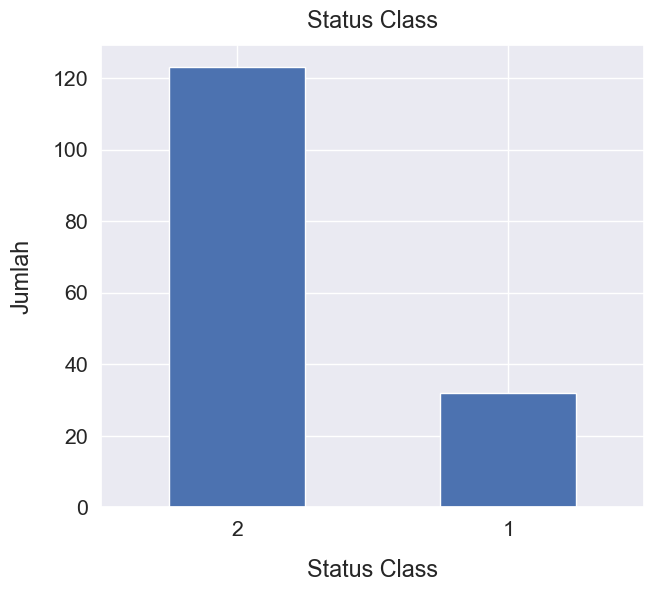

In [66]:
sns.set(font_scale=1.4)
data['Class'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Status Class", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Status Class", y=1.02);

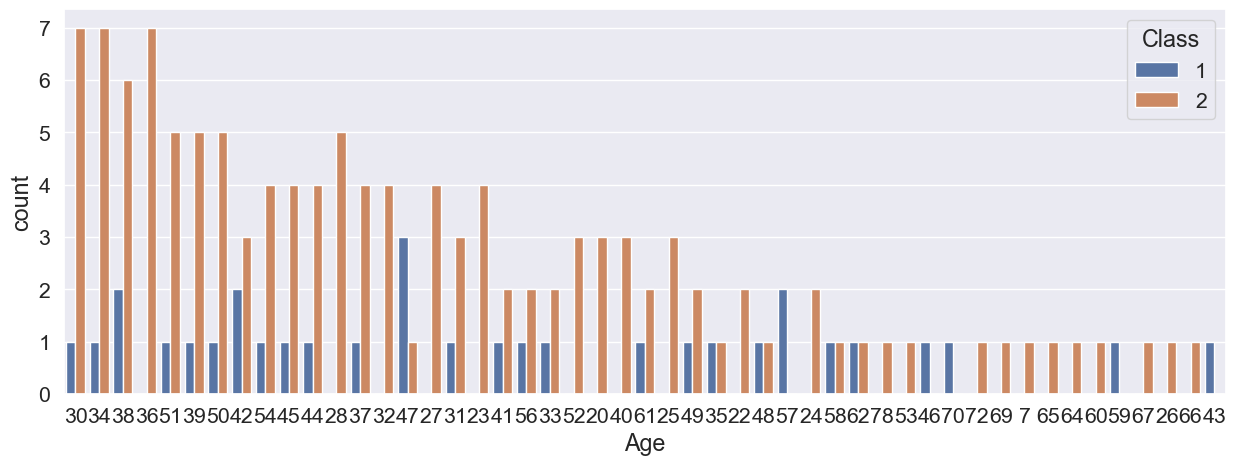

In [67]:
plt.subplots(figsize = (15,5))
sns.countplot(x=data['Age'],order=data['Age'].value_counts().index,hue=data['Class'])
plt.show()

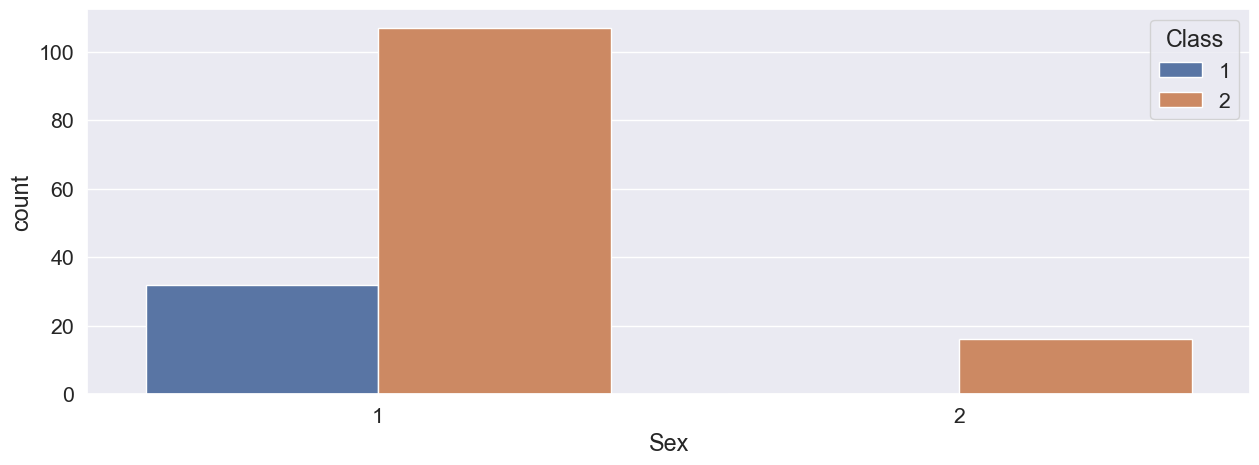

In [68]:
plt.subplots(figsize = (15,5))
sns.countplot(x=data['Sex'],order=data['Sex'].value_counts().index,hue=data['Class'])
plt.show()

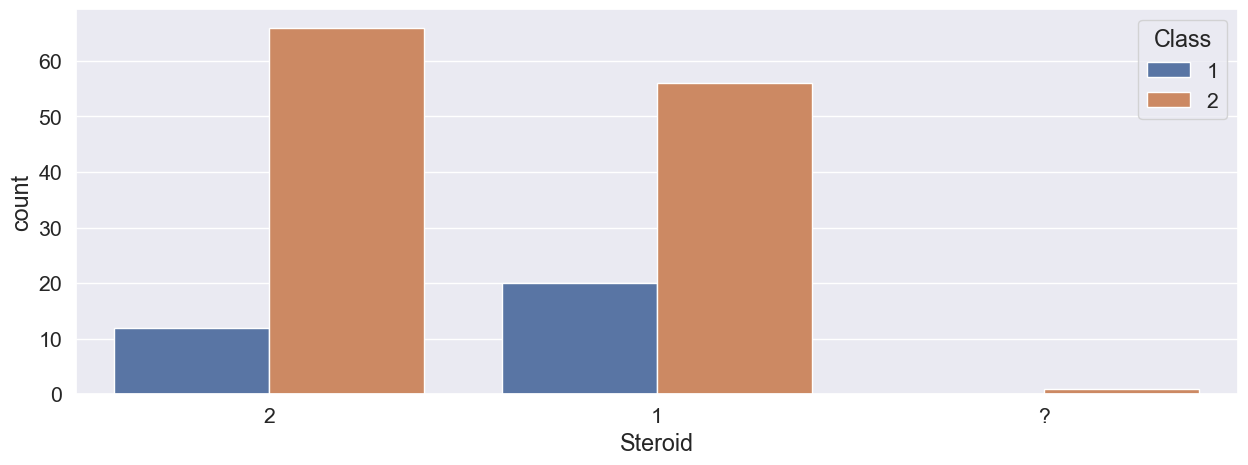

In [69]:
plt.subplots(figsize = (15,5))
sns.countplot(x=data['Steroid'],order=data['Steroid'].value_counts().index,hue=data['Class'])
plt.show()

In [70]:
# Correlation Heatmap
correlation = data.corr()
plt.subplots(figsize = (9,9))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

ValueError: could not convert string to float: '?'

## membersihkan data

In [71]:
data.replace("?", np.nan, inplace= True) #membersihkan data yang masih ada tanda tanya

In [72]:
data.head()

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_Big,Liver_Firm,Spleen_Palpable,Spiders,Ascites,Varices,Bilirubin,Alk_Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,NaN,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,NaN,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,NaN,1
3,2,31,1,NaN,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,NaN,200,4.0,NaN,1


In [73]:
data.tail()

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_Big,Liver_Firm,Spleen_Palpable,Spiders,Ascites,Varices,Bilirubin,Alk_Phosphate,Sgot,Albumin,Protime,Histology
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,NaN,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,NaN,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,NaN,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2
154,1,43,1,2,2,1,2,2,2,2,1,1,1,2,1.20,100,19,3.1,42,2


In [74]:
categorical_col = []
for column in data.columns:
    if data[column].dtype == object and len(data[column].unique()) <= 50: #mengecek level/isi data kolom (bisa object, int, dan tipe data lainnya)
        categorical_col.append(column)
        print(f"{column} : {data[column].unique()}")
        print("====================================")


Steroid : ['1' '2' nan]
Fatigue : ['2' '1' nan]
Malaise : ['2' '1' nan]
Anorexia : ['2' '1' nan]
Liver_Big : ['1' '2' nan]
Liver_Firm : ['2' '1' nan]
Spleen_Palpable : ['2' '1' nan]
Spiders : ['2' '1' nan]
Ascites : ['2' '1' nan]
Varices : ['2' nan '1']
Bilirubin : ['1.00' '0.90' '0.70' nan '1.30' '2.20' '2.00' '1.20' '0.60' '0.40' '0.80'
 '1.40' '2.30' '0.50' '0.30' '4.60' '1.80' '3.50' '4.10' '1.60' '2.80'
 '1.50' '2.50' '3.00' '4.80' '2.40' '1.70' '1.10' '3.20' '2.90' '8.00'
 '3.90' '1.90' '4.20' '7.60']
Albumin : ['4.0' '3.5' nan '4.4' '3.9' '3.7' '4.9' '2.9' '4.3' '4.1' '4.2' '4.7'
 '3.8' '2.7' '4.6' '5.0' '3.3' '4.5' '3.4' '3.1' '3.0' '2.6' '5.3' '4.8'
 '2.8' '3.6' '2.1' '6.4' '2.4' '2.2']
Protime : [nan '80' '75' '85' '54' '52' '78' '46' '63' '62' '64' '39' '100' '47'
 '70' '36' '40' '74' '60' '73' '90' '21' '77' '29' '41' '66' '57' '56'
 '76' '58' '84' '38' '67' '31' '51' '23' '72' '32' '30' '0' '50' '43' '35'
 '48' '42']


In [75]:
data.isnull().values.any() #Jika True artinya ada data yg hilang

True

In [76]:
data.loc[:, data.isnull().any()].columns #Feature yg terdiri data hilang

Index(['Steroid', 'Fatigue', 'Malaise', 'Anorexia', 'Liver_Big', 'Liver_Firm',
       'Spleen_Palpable', 'Spiders', 'Ascites', 'Varices', 'Bilirubin',
       'Alk_Phosphate', 'Sgot', 'Albumin', 'Protime'],
      dtype='object')

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Class            155 non-null    int64 
 1   Age              155 non-null    int64 
 2   Sex              155 non-null    int64 
 3   Steroid          154 non-null    object
 4   Antivirals       155 non-null    int64 
 5   Fatigue          154 non-null    object
 6   Malaise          154 non-null    object
 7   Anorexia         154 non-null    object
 8   Liver_Big        145 non-null    object
 9   Liver_Firm       144 non-null    object
 10  Spleen_Palpable  150 non-null    object
 11  Spiders          150 non-null    object
 12  Ascites          150 non-null    object
 13  Varices          150 non-null    object
 14  Bilirubin        149 non-null    object
 15  Alk_Phosphate    126 non-null    object
 16  Sgot             151 non-null    object
 17  Albumin          139 non-null    ob

<Axes: >

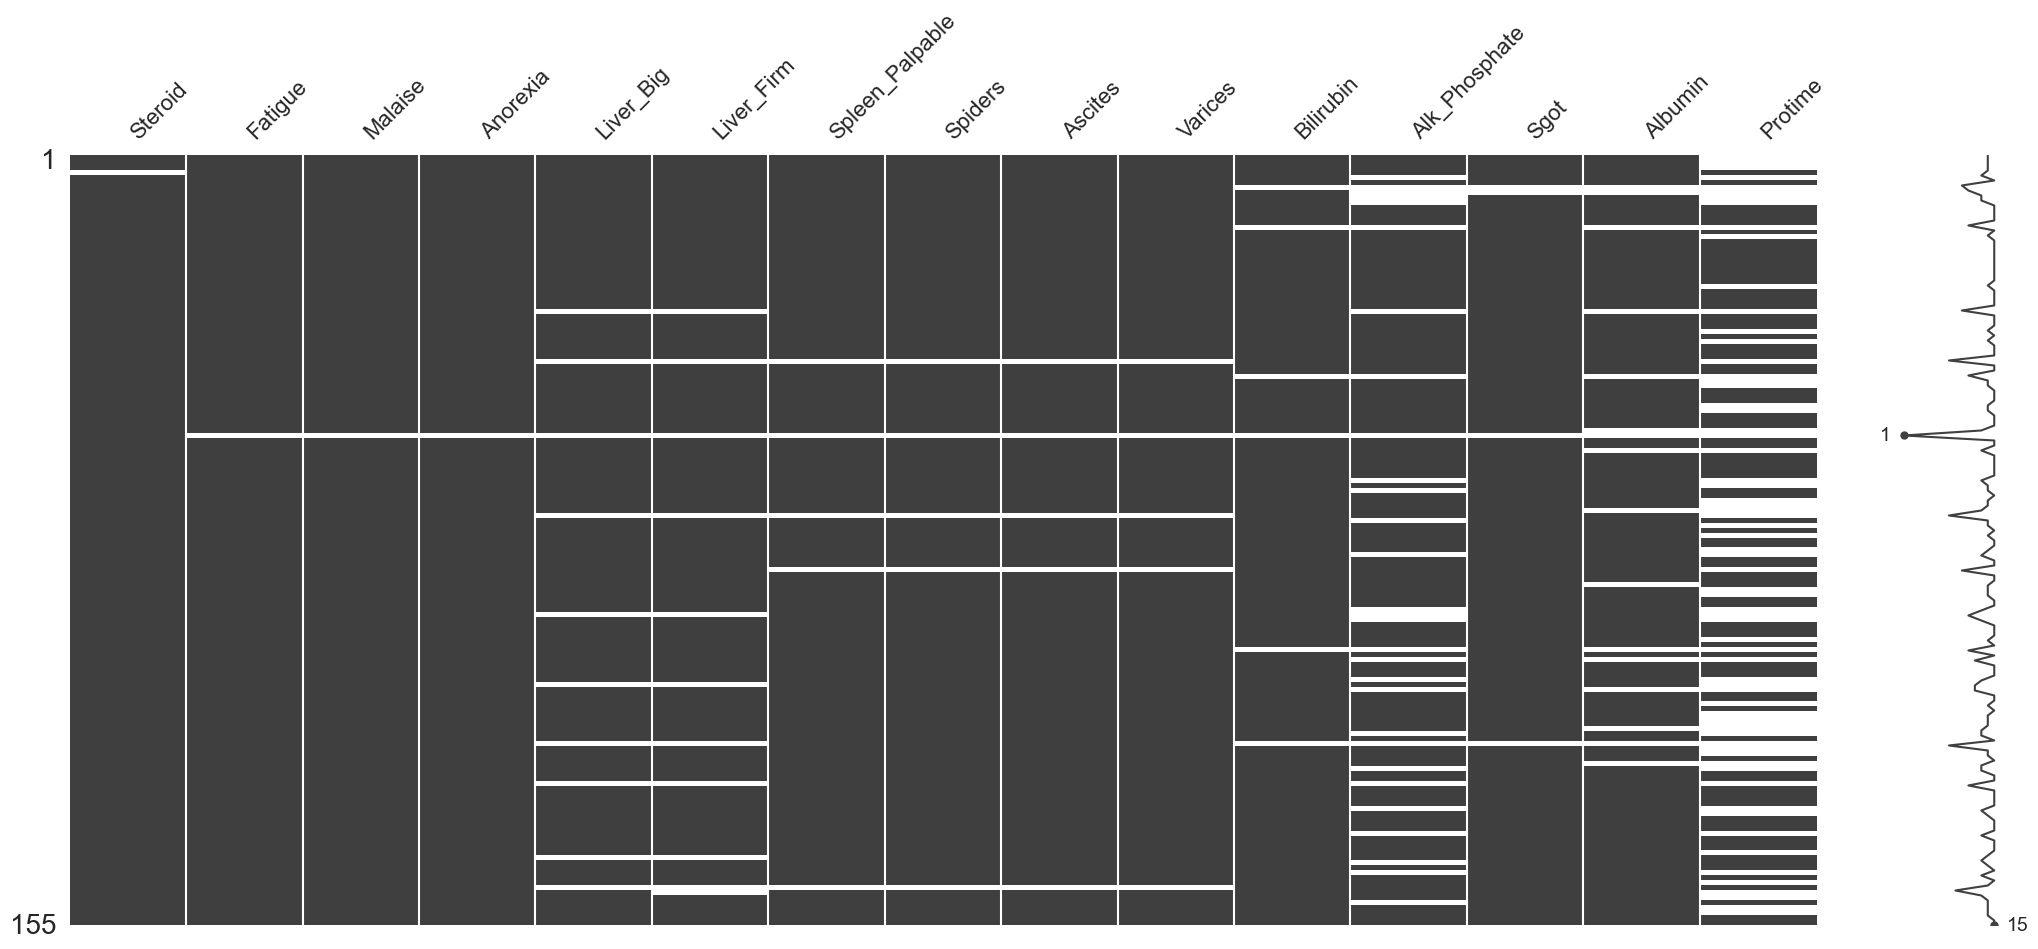

In [78]:
missingdata_df = data.columns[data.isnull().any()].tolist()
missingno.matrix(data[missingdata_df])

## mengisi data yg hilang

In [79]:
# data hilang : Steroid 'Fatigue', 'Malaise', 'Anorexia', 'Liver_Big', 'Liver_Firm'
#,'Spleen_Palpable', 'Spiders', 'Ascites', 'Varices', 'Bilirubin','Alk_Phosphate', 'Sgot', 'Albumin', 'Protime'
median_value=data['Steroid'].median()
data['Steroid']=data['Steroid'].fillna(median_value)

median_value=data['Fatigue'].median()
data['Fatigue']=data['Fatigue'].fillna(median_value)

median_value=data['Malaise'].median()
data['Malaise']=data['Malaise'].fillna(median_value)

median_value=data['Anorexia'].median()
data['Anorexia']=data['Anorexia'].fillna(median_value)

median_value=data['Liver_Big'].median()
data['Liver_Big']=data['Liver_Big'].fillna(median_value)

median_value=data['Liver_Firm'].median()
data['Liver_Firm']=data['Liver_Firm'].fillna(median_value)

median_value=data['Spleen_Palpable'].median()
data['Spleen_Palpable']=data['Spleen_Palpable'].fillna(median_value)

median_value=data['Spiders'].median()
data['Spiders']=data['Spiders'].fillna(median_value)

median_value=data['Ascites'].median()
data['Ascites']=data['Ascites'].fillna(median_value)

median_value=data['Varices'].median()
data['Varices']=data['Varices'].fillna(median_value)

median_value=data['Bilirubin'].median()
data['Bilirubin']=data['Bilirubin'].fillna(median_value)

median_value=data['Alk_Phosphate'].median()
data['Alk_Phosphate']=data['Alk_Phosphate'].fillna(median_value)

median_value=data['Sgot'].median()
data['Sgot']=data['Sgot'].fillna(median_value)

median_value=data['Albumin'].median()
data['Albumin']=data['Albumin'].fillna(median_value)

median_value=data['Protime'].median()
data['Protime']=data['Protime'].fillna(median_value)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Class            155 non-null    int64 
 1   Age              155 non-null    int64 
 2   Sex              155 non-null    int64 
 3   Steroid          155 non-null    object
 4   Antivirals       155 non-null    int64 
 5   Fatigue          155 non-null    object
 6   Malaise          155 non-null    object
 7   Anorexia         155 non-null    object
 8   Liver_Big        155 non-null    object
 9   Liver_Firm       155 non-null    object
 10  Spleen_Palpable  155 non-null    object
 11  Spiders          155 non-null    object
 12  Ascites          155 non-null    object
 13  Varices          155 non-null    object
 14  Bilirubin        155 non-null    object
 15  Alk_Phosphate    155 non-null    object
 16  Sgot             155 non-null    object
 17  Albumin          155 non-null    ob

## BAB 6 – mengkonstruksi data


In [81]:
#mengubah tipe data object menjadi float

data['Steroid'] = data['Steroid'].astype(str).astype(float)
data['Fatigue'] = data['Fatigue'].astype(str).astype(float)
data['Malaise'] = data['Malaise'].astype(str).astype(float)
data['Anorexia'] = data['Anorexia'].astype(str).astype(float)
data['Liver_Big'] = data['Liver_Big'].astype(str).astype(float)
data['Liver_Firm'] = data['Liver_Firm'].astype(str).astype(float)
data['Spleen_Palpable'] = data['Spleen_Palpable'].astype(str).astype(float)
data['Spiders'] = data['Spiders'].astype(str).astype(float)
data['Ascites'] = data['Ascites'].astype(str).astype(float)
data['Varices'] = data['Varices'].astype(str).astype(float)
data['Bilirubin'] = data['Bilirubin'].astype(str).astype(float)
data['Alk_Phosphate'] = data['Alk_Phosphate'].astype(str).astype(float)
data['Sgot'] = data['Sgot'].astype(str).astype(float)
data['Albumin'] = data['Albumin'].astype(str).astype(float)
data['Protime'] = data['Protime'].astype(str).astype(float)

In [82]:
data

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_Big,Liver_Firm,Spleen_Palpable,Spiders,Ascites,Varices,Bilirubin,Alk_Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,61.0,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,61.0,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,61.0,1
3,2,31,1,2.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,200.0,4.0,61.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,85.0,242.0,3.3,50.0,2
151,2,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,61.0,2
152,2,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,61.0,2
153,2,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            155 non-null    int64  
 1   Age              155 non-null    int64  
 2   Sex              155 non-null    int64  
 3   Steroid          155 non-null    float64
 4   Antivirals       155 non-null    int64  
 5   Fatigue          155 non-null    float64
 6   Malaise          155 non-null    float64
 7   Anorexia         155 non-null    float64
 8   Liver_Big        155 non-null    float64
 9   Liver_Firm       155 non-null    float64
 10  Spleen_Palpable  155 non-null    float64
 11  Spiders          155 non-null    float64
 12  Ascites          155 non-null    float64
 13  Varices          155 non-null    float64
 14  Bilirubin        155 non-null    float64
 15  Alk_Phosphate    155 non-null    float64
 16  Sgot             155 non-null    float64
 17  Albumin         

In [86]:
data = data.loc[:,data.apply(pd.Series.nunique) != 1]

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            155 non-null    int64  
 1   Age              155 non-null    int64  
 2   Sex              155 non-null    int64  
 3   Steroid          155 non-null    float64
 4   Antivirals       155 non-null    int64  
 5   Fatigue          155 non-null    float64
 6   Malaise          155 non-null    float64
 7   Anorexia         155 non-null    float64
 8   Liver_Big        155 non-null    float64
 9   Liver_Firm       155 non-null    float64
 10  Spleen_Palpable  155 non-null    float64
 11  Spiders          155 non-null    float64
 12  Ascites          155 non-null    float64
 13  Varices          155 non-null    float64
 14  Bilirubin        155 non-null    float64
 15  Alk_Phosphate    155 non-null    float64
 16  Sgot             155 non-null    float64
 17  Albumin         

## cek korelasi tahap 2

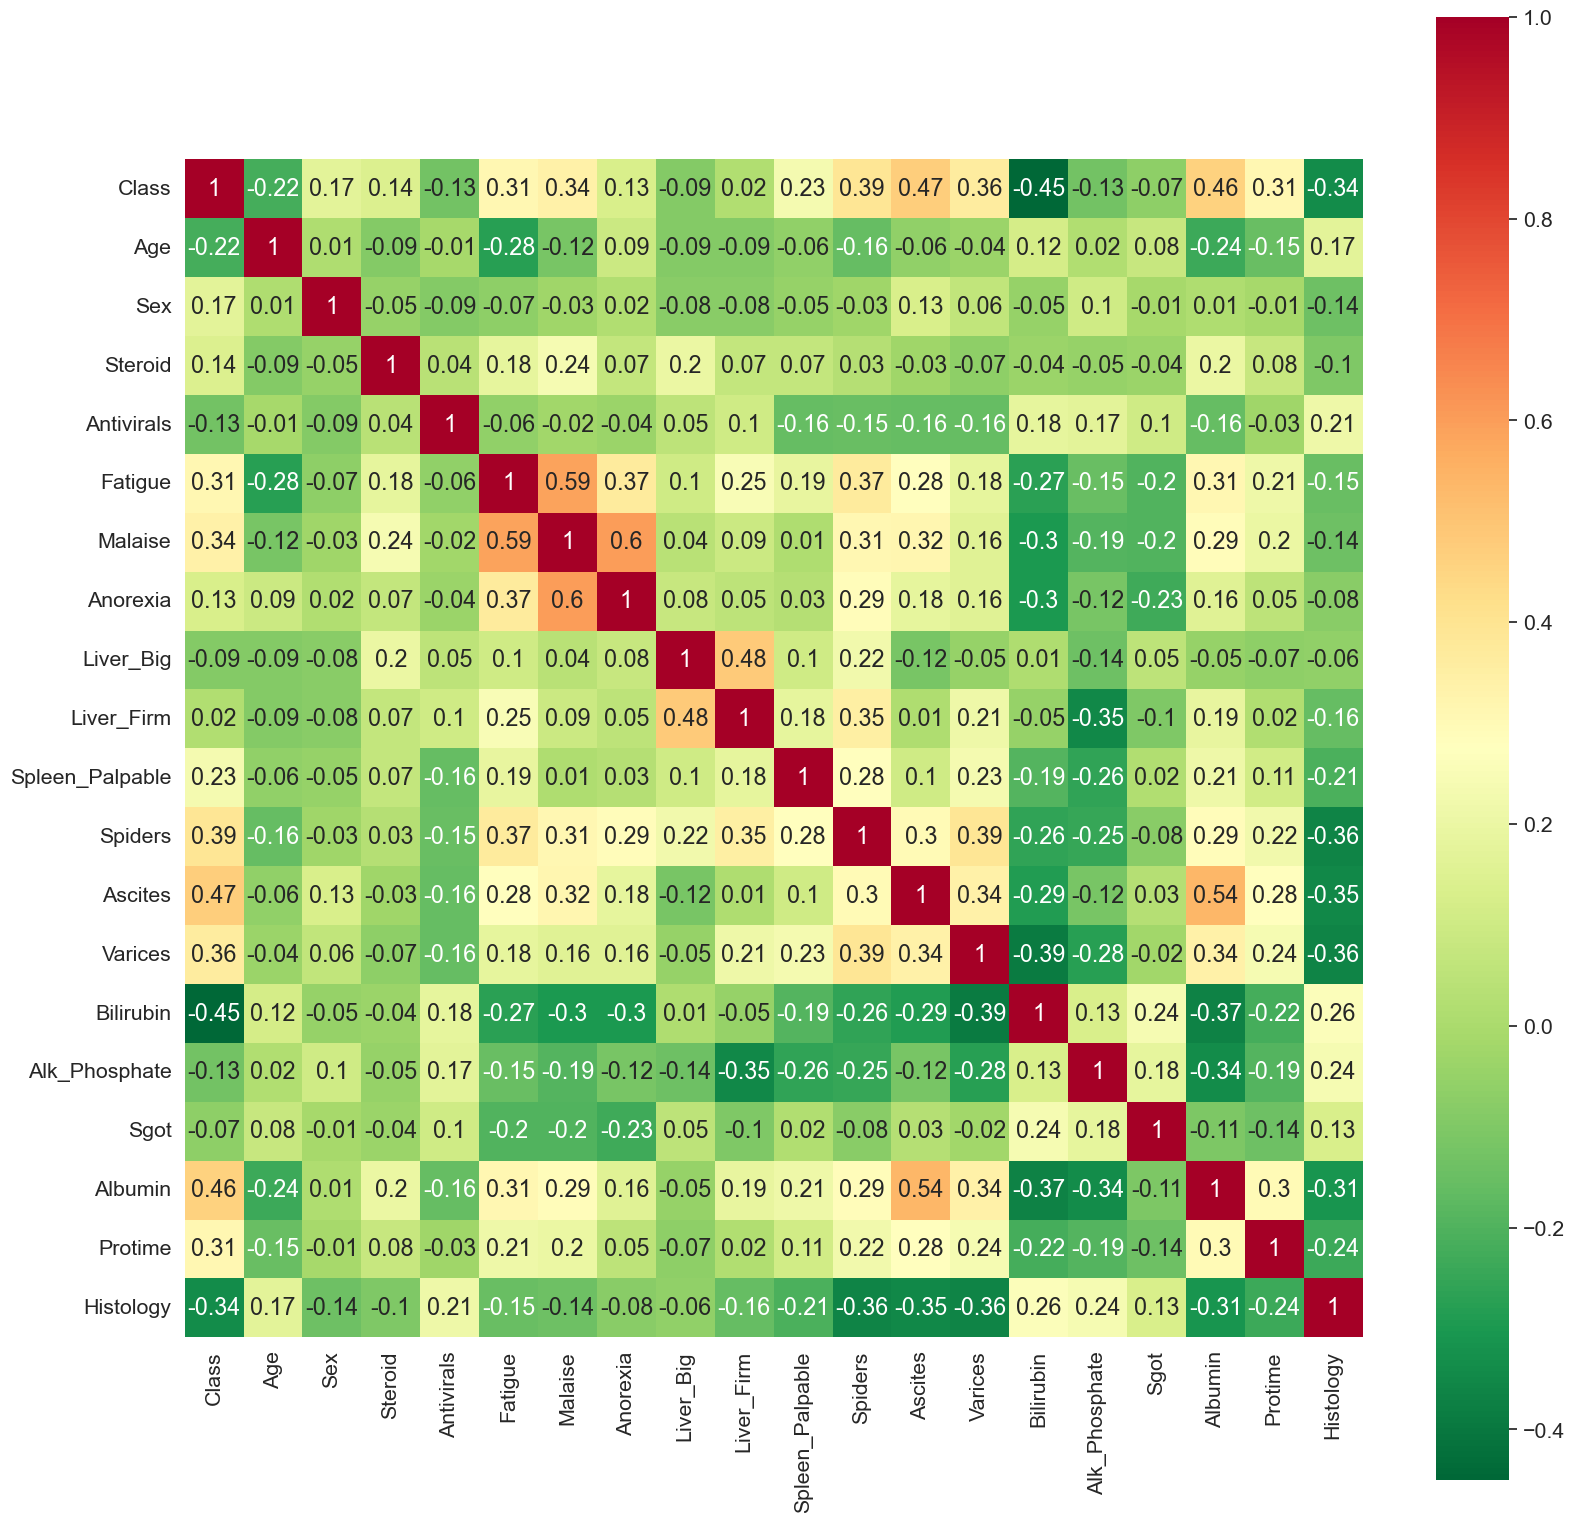

In [89]:
# Correlation Heatmap
correlation = data.corr()
plt.subplots(figsize = (19,19))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

cek blox plot

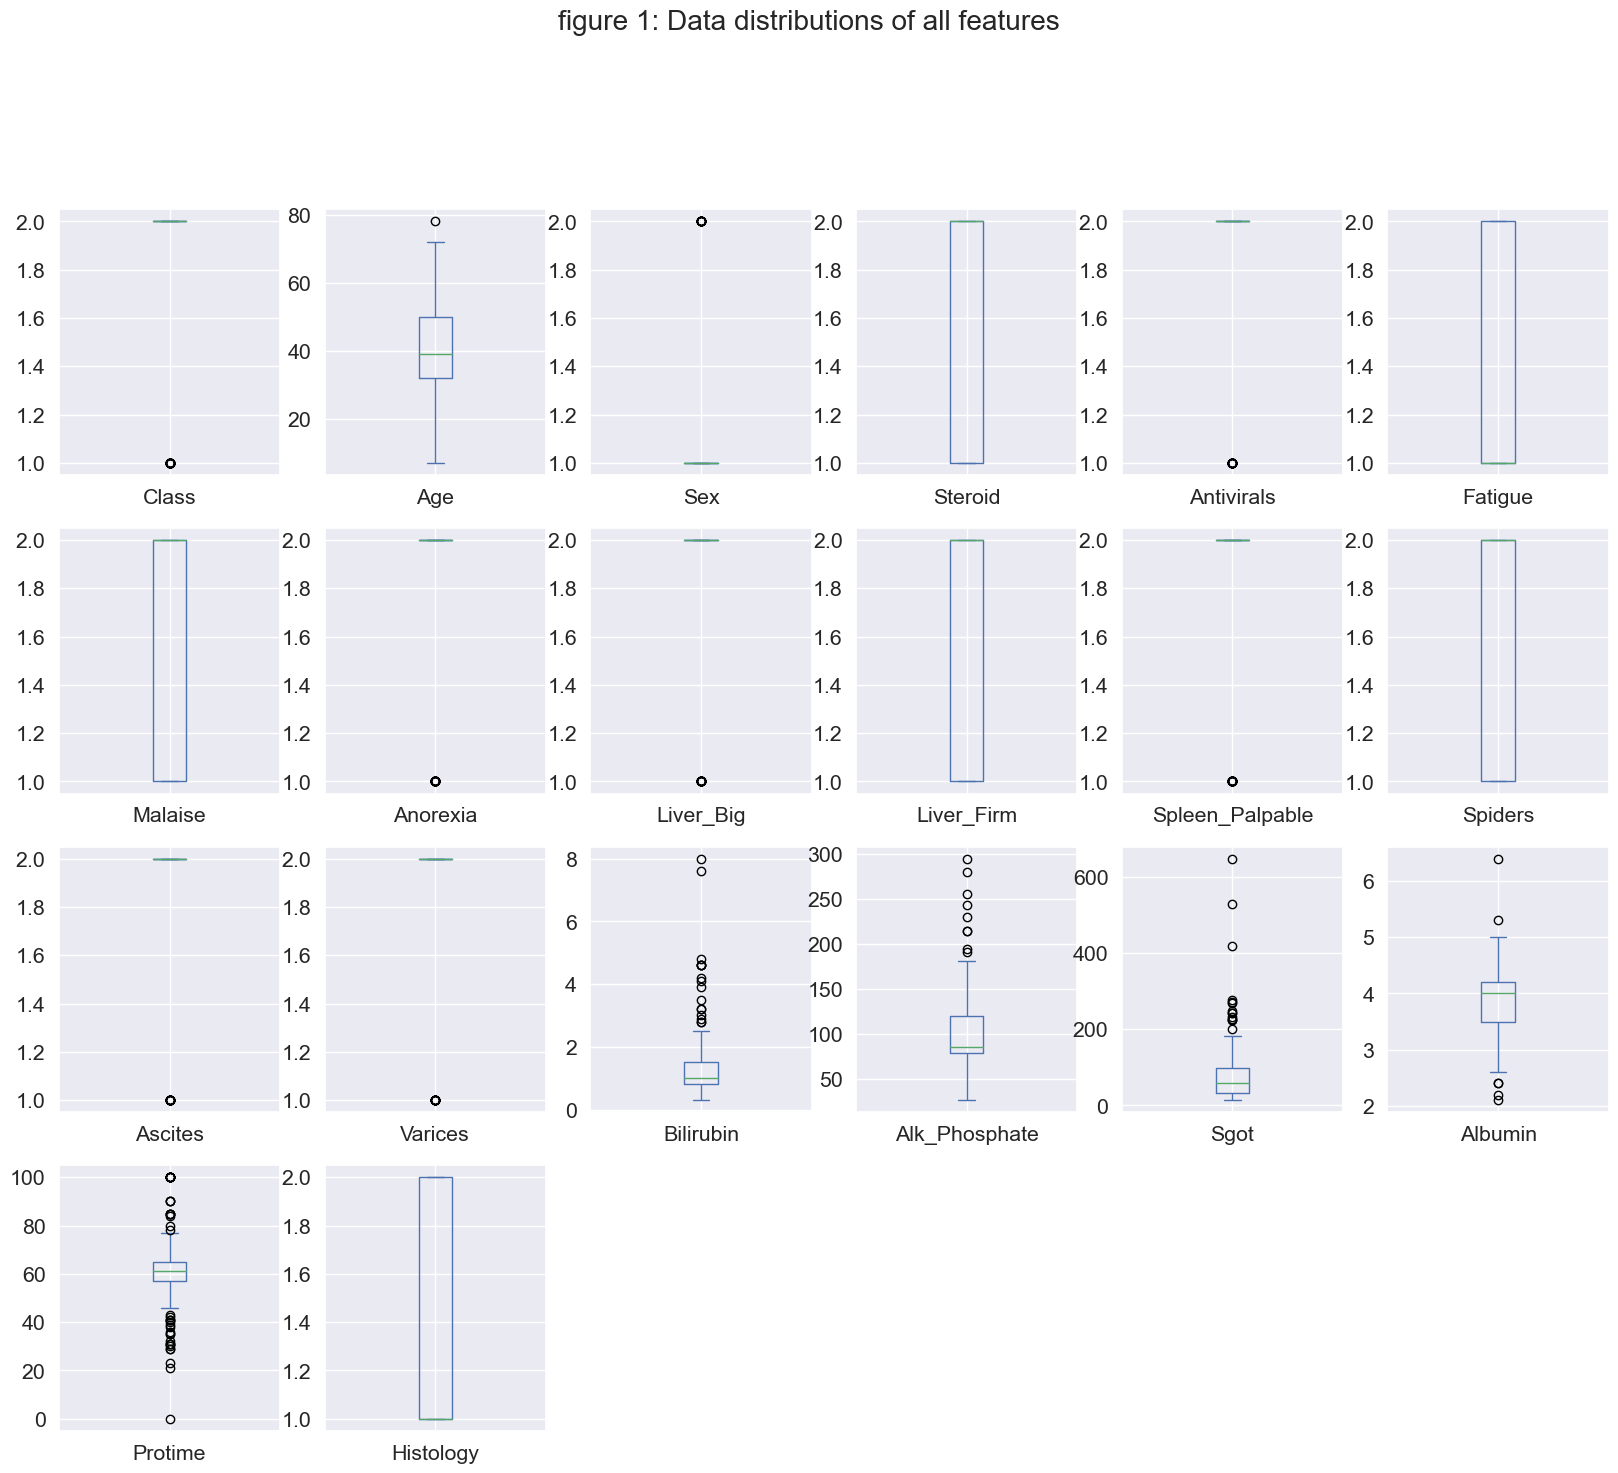

In [90]:
data.plot(kind='box',subplots=True,layout=(5,6), sharex=False,figsize = (20,20),
                           title='figure 1: Data distributions of all features')
plt.show()